# Q1. Write a query to Join three tables in SQL

In [1]:
import sqlite3
import pandas as pd


In [2]:
# create a connection to your new database

conn = sqlite3.connect('test_database') 
c = conn.cursor()

Here is an entity relationship diagram (ERD) showing the four tables we will create and thier relationships

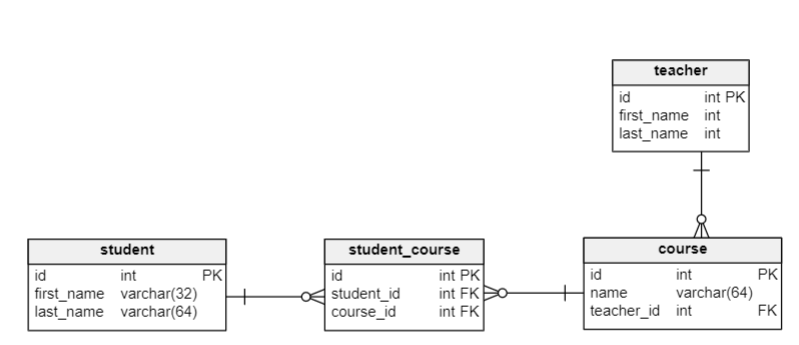

In [3]:
# create three tables + the connector table
c.execute('''
          CREATE TABLE student
          ([id] INTEGER PRIMARY KEY, [first_name] TEXT, [last_name] TEXT)
          ''')
          
c.execute('''
          CREATE TABLE IF NOT EXISTS course
          ([id] INTEGER PRIMARY KEY, [name] TEXT, [teacher_id] INTEGER)
          ''')

c.execute('''
          CREATE TABLE IF NOT EXISTS teacher
          ([id] INTEGER PRIMARY KEY, [first_name] TEXT, [last_name] TEXT)
          ''')

c.execute('''
          CREATE TABLE IF NOT EXISTS student_course
          ([id] INTEGER PRIMARY KEY, [student_id] INTEGER, [course_id] INTEGER)
          ''')
conn.commit()

In [4]:
# now we insert values into the tables
c.execute('''
          INSERT INTO student (id, first_name, last_name)

                VALUES
                (1,'Halley', 'Chopra'),
                (2,'Julie', 'Hong'),
                (3,'Michael', 'Colbourne')
          ''')

c.execute('''
          INSERT INTO teacher (id, first_name, last_name)

                VALUES
                (1,'Minnie', 'Mouse'),
                (2,'Mickey', 'Mouse'),
                (3,'Daffy', 'Duck')
          ''')

c.execute('''
          INSERT INTO course (id, name, teacher_id)

                VALUES
                (1,'English', 2),
                (2,'Programming', 1),
                (3,'PhysEd', 1)
          ''')

c.execute('''
          INSERT INTO student_course (id, student_id, course_id)

                VALUES
                (1, 1, 2),
                (2, 1, 1),
                (3, 2, 1),
                (4, 3, 1),
                (5, 3, 3)
          ''')

conn.commit()

In [5]:
# check we were successful
import pandas as pd

c.execute('''
          SELECT *
          FROM student
          ''')

students_df = pd.DataFrame(c.fetchall(), columns=['id', 'first_name', 'last_name'])
print (students_df)

   id first_name  last_name
0   1     Halley     Chopra
1   2      Julie       Hong
2   3    Michael  Colbourne


In [6]:
# join the three tables

c.execute('''
          SELECT
            student.first_name,
            student.last_name,
            course.name
          FROM student
          JOIN student_course
            ON student.id = student_course.student_id
          JOIN course
            ON course.id = student_course.course_id
          ''')

join_df = pd.DataFrame(c.fetchall(), columns=['student first name', 'student last name', 'course name'])
print (join_df)

  student first name student last name  course name
0             Halley            Chopra  Programming
1             Halley            Chopra      English
2              Julie              Hong      English
3            Michael         Colbourne      English
4            Michael         Colbourne       PhysEd


In [11]:
# display information from three tables

c.execute('''
          SELECT
            student.first_name,
            student.last_name,
            course.name,
            teacher.first_name
          FROM student

          JOIN student_course
            ON student.id = student_course.student_id
          JOIN course
            ON course.id = student_course.course_id
          JOIN teacher
            ON teacher.id = course.teacher_id
          ''')

join2_df = pd.DataFrame(c.fetchall(), columns=['student first name', 'student last name', 'course name', 'teacher first name'])
print (join2_df)

  student first name student last name  course name teacher first name
0             Halley            Chopra  Programming             Minnie
1             Halley            Chopra      English             Mickey
2              Julie              Hong      English             Mickey
3            Michael         Colbourne      English             Mickey
4            Michael         Colbourne       PhysEd             Minnie
